Proposed by Prof John Belz and Kaixin Wang

# Main Content

In [1]:
# computers understand numbers as strings of digits
import math
math.sqrt(8)

2.8284271247461903

In [2]:
# however it's often more convenient to display numbers symbolically
import sympy
sympy.sqrt(8)

2*sqrt(2)

In [3]:
# right-click on the symbolic expression above to see how it is expressed in LaTex
# we can also display functions symbolically...
from sympy import symbols

In [4]:
x, y = symbols('x y')
f = x + 2*y
f

x + 2*y

In [5]:
g = x*f
g

x*(x + 2*y)

In [6]:
# ... and manipulate them symbolically into more convenient forms
from sympy import expand, factor
expand(g)

x**2 + 2*x*y

In [7]:
factor(expand(g))

x*(x + 2*y)

In [8]:
# what else can we do symbolically? Differentiate and integrate:
from sympy import *

In [9]:
x, t, z, mu = symbols('x t z mu')

In [10]:
diff(mu*sin(x)*exp(x),x)

mu*exp(x)*sin(x) + mu*exp(x)*cos(x)

In [11]:
Derivative(mu*sin(x)*exp(x),x,x)

Derivative(mu*exp(x)*sin(x), (x, 2))

In [12]:
# note how SymPy recognized the greek letter
g = integrate(mu*exp(x)*sin(x)+mu*exp(x)*cos(x),x)
g

mu*(exp(x)*sin(x)/2 - exp(x)*cos(x)/2) + mu*(exp(x)*sin(x)/2 + exp(x)*cos(x)/2)

In [13]:
# Hmmm, seems like we should be able to do better than that
simplify(g)

mu*exp(x)*sin(x)

In [14]:
# SymPy can find zeros of expressions symbolically
solve(x**2-x-6,x)

[-2, 3]

In [15]:
# SymPy can solve (analytically solvable!) differential equations
y=Function('y')
h = Derivative(y(x), x, x) + 9*y(x)
h

9*y(x) + Derivative(y(x), (x, 2))

In [16]:
dsolve(h, y(x))

Eq(y(x), C1*sin(3*x) + C2*cos(3*x))

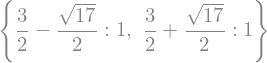

In [17]:
# SymPy can do symbolic matrix manipulation
from sympy.matrices import Matrix, eye, zeros, ones, diag, GramSchmidt
init_printing(use_unicode=False, wrap_line=False)
A = Matrix([[1, 2], [2, 2]])
A.eigenvals()

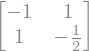

In [18]:
B = A.inv(); B

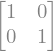

In [19]:
A*B

# Fourier transform by SymPy

In [20]:
# Use sympy to calculate Fourier series
from sympy import fourier_series, pi, plot
from sympy.abc import x,L,H

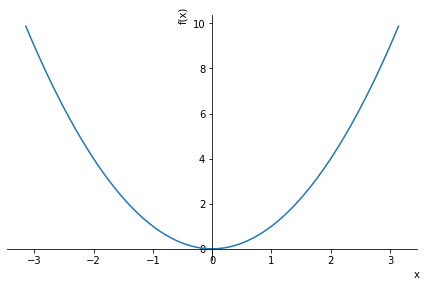

In [21]:
# basic example
f = x**2
p = plot(f, (x, -pi, pi))

In [22]:
s = fourier_series(f,(x,-pi,pi))

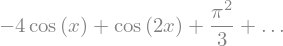

In [23]:
s

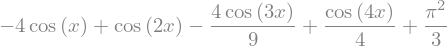

In [24]:
# note that the answer is automatically truncated at 3 terms. 
# but we can choose to display more
s.truncate(5)

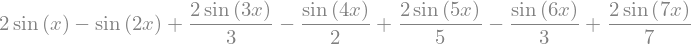

In [25]:
# now a more involved example. 
# plot the original function, superimpose Fourier series of various orders 
from sympy.abc import x
f = x
s = fourier_series(f, (x, -pi, pi))
s.truncate(7)

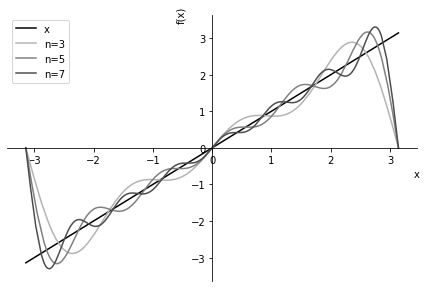

In [26]:
s1 = s.truncate(3)
s2 = s.truncate(5)
s3 = s.truncate(7)
p = plot(f, s1, s2, s3, (x, -pi, pi), show=False, legend=True)
p[0].line_color = (0, 0, 0)
p[0].label = 'x'
p[1].line_color = (0.7, 0.7, 0.7)
p[1].label = 'n=3'
p[2].line_color = (0.5, 0.5, 0.5)
p[2].label = 'n=5'
p[3].line_color = (0.3, 0.3, 0.3)
p[3].label = 'n=7'
p.show()

In [27]:
# we'll need one more thing to find series for arbitrary piecewise functions
from sympy import Piecewise

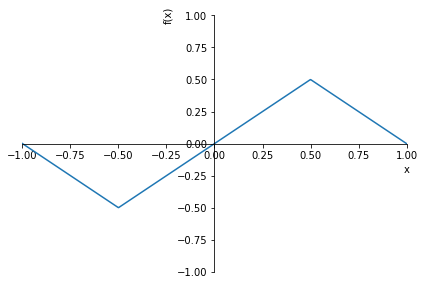

In [28]:
f = Piecewise((-(x+1), x < -1/2), (x, x < 1/2), (-(x-1), x > 1/2))
p = plot(f,xlim=(-1,1),ylim=(-1,1),show=False)
p.show()

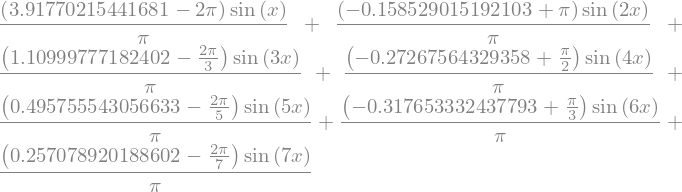

In [29]:
s = fourier_series(f, (x, -pi, pi))
s.truncate(7)

# An Example

In [30]:
#Package
from sympy import fourier_series, pi, plot
from sympy.abc import x, H, L
from sympy import Piecewise

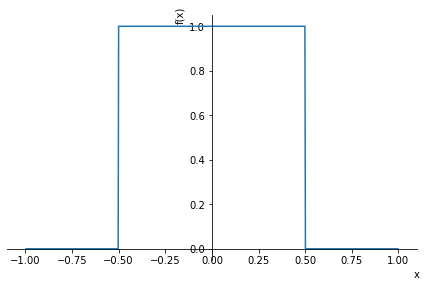

In [31]:
H = L = 1
f = Piecewise((0, (x <= -L/2) & (x >= -L)), (H, (x < L/2) & (x > -L/2)),(0,(x >= L/2) & (x <= L)))
p = plot(f,show=True)

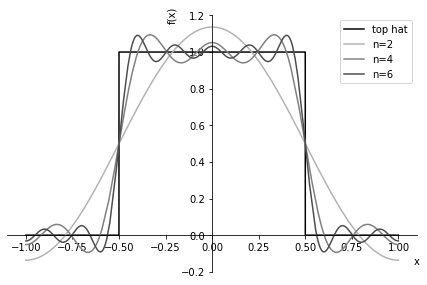

In [32]:
s = fourier_series(f, (x,-1,1))
s1 = s.truncate(2)
s2 = s.truncate(4)
s3 = s.truncate(6)
p = plot(f, s1, s2, s3, (x,-1,1), show=False, legend=True)
p[0].line_color = (0, 0, 0)
p[0].label = 'top hat'
p[1].line_color = (0.7, 0.7, 0.7)
p[1].label = 'n=2'
p[2].line_color = (0.5, 0.5, 0.5)
p[2].label = 'n=4'
p[3].line_color = (0.3, 0.3, 0.3)
p[3].label = 'n=6'
p.show()

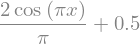

In [33]:
#truncate(2)
s1

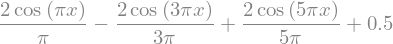

In [34]:
#truncate(4)
s2

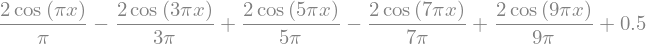

In [35]:
#truncate(6)
s3